## NYC Child Services

### SetUp

In [4]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [5]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

This is a Python notebook, but below is an R cell. The `%%R` at the top of the cell indicates that the code in this cell will be R code.

In [6]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


### Load Data

In [7]:
# read pdf file asc_data.csv
df = pd.read_csv('acs_data_formatted.csv')
df

,race,total,indicated_investigations,unsubstantiated_investigations,cares_cases,referral_prevention,emergency_removals,articlex_filings,remands,foster_care
0,black,34923,9893,20317,4103,7011,801,3230,1124,1197
1,hispanic,41247,11889,23581,5085,8754,590,3458,809,947
2,white,6463,1428,4198,752,1128,45,368,110,134
3,asian,5110,1162,3147,724,973,43,294,52,73
4,multiple-race,2913,854,1715,290,591,56,290,93,113
5,other,1649,210,1119,201,91,0,49,14,9


### Terminology


SCR intakes = Statewide Central Register of Child Abuse and Maltreatment (SCR) 

### Step 1
Indicated Investigations = A report to the SCR that ACS determines, after an investigation, to be supported by some credible evidence. An indicated investigation is not the same as a court finding of neglect and does not necessarily mean that any court action will be taken against the parent.

### Step 2  
Unsubstantiated Investigations = CPS did not find enough evidence to support the claim that a child has been abused or neglected. You will receive a letter from the New York State Central Register (SCR) that the report was unfounded.

### Step 3
CARES Cases = Collaborative Assessment, Response, Engagement & Support (CARES) is an alternative, non-investigatory child protection response to reports made to the Statewide Central Register (SCR) of Child Abuse and Maltreatment.

### Step 4
ACS Referral to Prevention = When a CPS assesses a family's need for services and subsequently refers the family to prevention services, CPS shall make the referral as early as possible in the investigation. Early referrals enable CPS and the provider agency case planner to collaborate in introducing the family to appropriate services and to verify that the family remains connected to services. 

### Step 5
Emergency Removals = If, at any point during the investigation, ACS determines that the child is not safe in your home, ACS is required to conduct an emergency removal (during the hours Family Court is not in session).

### Step 6
Article X Filings = If your child has been removed from your custody without your consent based on a court order because the police, a social service organization, or the court believes that your child has been abused or neglected, you have the right to seek the return of the child to your custody under Family Court Act Article 10.

### Step 7
Remands at Initial Hearings = The number of temporary foster care placements (remands) as a result of initial hearings of abuse and maltreatment petitions

### Step 8
Article X Foster Care Entries = A case formally filed by ACS in family court that alleges that a parent neglected or abused their children. 

# Hypothesis Testing

"Currently in New York, Black families are seven times as likely as white families to be reported to the family regulation system and 13 times more likely to have their children removed. Roughly ninety percent of the families ACS investigates are Black or Brown," according to ACS.

H0 = There is no relationship between race/ethnicity and foster care entries

HA= There is a relationship between race/ethnicity and foster care entries


## Editorial Decisions based on Initial Interview with ACS

### Children vs Parents
This analysis will look at both. There are different characteristics for parents and children which while separately grouped, are still related and form a fuller picture of the family. 

### Categories in Steps to be used in the analysis
The data shows the steps of the child welfare system from the report to the ACS to the case being filed by the ACS to the parents. This analysis will use SCR reports as the baseline figure and foster care entries to measure outcome.   

### FOIA request
Recommendation from ACS is to do a FOIA request to get more nuanced data that shows the race of the families as well as the districts where they belong to. The request can be directed to the Policy, Planning, and Measurement department. 



# Exploratory Data

## Data Exploration

In [8]:
# read pdf file acs_long.csv

df_long = pd.read_csv('acs_long.csv')
df_long

,race,step,count
0,black,0,34923
1,hispanic,0,41247
2,white,0,6463
3,asian,0,5110
4,multiple-race,0,2913
5,other,0,1649
6,black,1,9893
7,hispanic,1,11889
8,white,1,1428
9,asian,1,1162


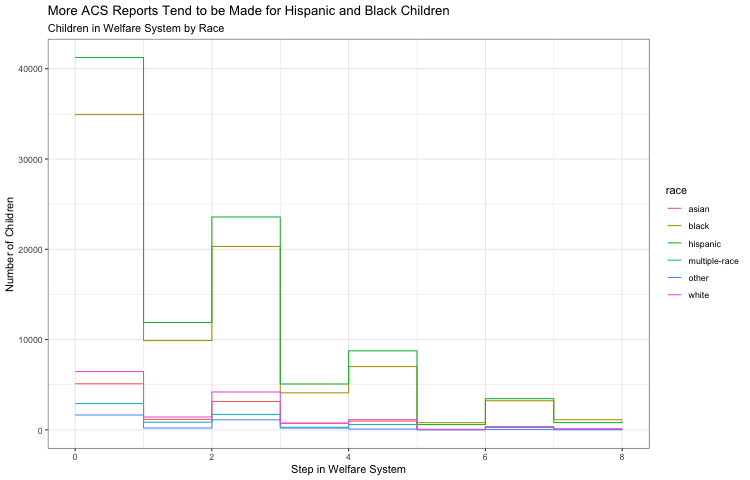

In [9]:
%%R -i df_long -w 750

ggplot(df_long, aes(x = step, y = count, color = race, group = race)) +
    geom_step() +
    labs(title = 'More ACS Reports Tend to be Made for Hispanic and Black Children',subtitle = 'Children in Welfare System by Race', x = 'Step in Welfare System', y = 'Number of Children') +
    theme_bw()


In [10]:

data = {
    'race': ['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black'],
    'step': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'count': [34923, 9893, 20317, 4103, 7011, 801, 3230, 1124, 1197]
}

df_black = pd.DataFrame(data)
(df_black)


,race,step,count
0,black,0,34923
1,black,1,9893
2,black,2,20317
3,black,3,4103
4,black,4,7011
5,black,5,801
6,black,6,3230
7,black,7,1124
8,black,8,1197


In [11]:
# Black children who do not end up in foster care:
reported = 34923
foster_cases = 1197

spared = reported - foster_cases
print(spared)

33726


In [12]:
data = {
    'race': ['hispanic', 'hispanic', 'hispanic', 'hispanic', 'hispanic', 'hispanic', 'hispanic', 'hispanic', 'hispanic'],
    'step': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'count': [41247, 11889, 23581, 5085, 8754, 590, 3458, 809, 947]
}

df_hispanic = pd.DataFrame(data)
df_hispanic

,race,step,count
0,hispanic,0,41247
1,hispanic,1,11889
2,hispanic,2,23581
3,hispanic,3,5085
4,hispanic,4,8754
5,hispanic,5,590
6,hispanic,6,3458
7,hispanic,7,809
8,hispanic,8,947


In [13]:
# Hispanic children who do not end up in foster care:
reported = 41247
foster_cases = 947

spared = reported - foster_cases
print(spared)

40300


In [14]:
data = {
    'race': ['white', 'white', 'white', 'white', 'white', 'white', 'white', 'white', 'white'],
    'step': [0, 1, 2, 3, 4, 5, 6, 7, 8],
    'count': [6463, 1428, 4198, 752, 1128, 45, 368, 110, 134]
}

df_white = pd.DataFrame(data)
df_white

,race,step,count
0,white,0,6463
1,white,1,1428
2,white,2,4198
3,white,3,752
4,white,4,1128
5,white,5,45
6,white,6,368
7,white,7,110
8,white,8,134


In [15]:
# White children who do not end up in foster care:
reported = 6463
foster_cases = 134

spared = reported - foster_cases
print(spared)

6329


In [16]:
combined = pd.concat([df_black, df_hispanic, df_white])
combined

,race,step,count
0,black,0,34923
1,black,1,9893
2,black,2,20317
3,black,3,4103
4,black,4,7011
5,black,5,801
6,black,6,3230
7,black,7,1124
8,black,8,1197
0,hispanic,0,41247


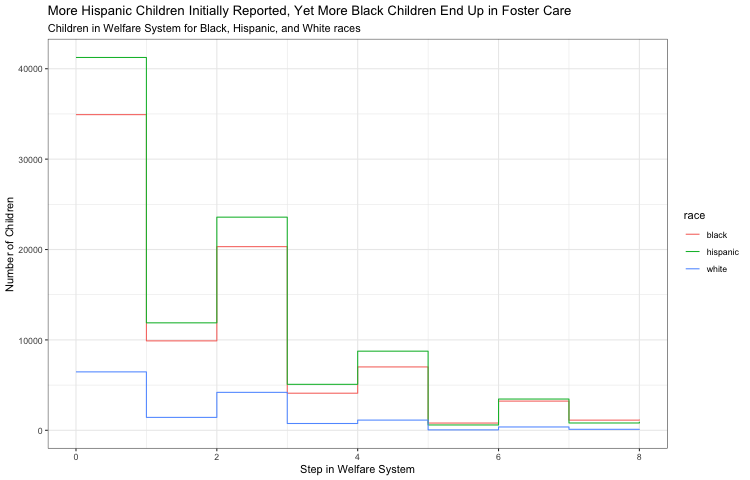

In [17]:
%%R -i combined -w 750

ggplot(combined, aes(x = step, y = count, color = race, group = race)) +
  geom_step() +
  labs(title = 'More Hispanic Children Initially Reported, Yet More Black Children End Up in Foster Care' ,subtitle = 'Children in Welfare System for Black, Hispanic, and White races', x = 'Step in Welfare System', y = 'Number of Children') +
  theme_bw()

## Statistical Test

### T-Test

In [18]:
%%R

# t-test for the difference in means between the percentage of hispanic children and white children in the scr_intakes

scr_intakes_hispanic = 41247
scr_intakes_black = 34923

t.test(c(scr_intakes_hispanic, scr_intakes_black), alternative = 'two.sided', mu = 0, paired = FALSE, var.equal = FALSE, conf.level = 0.95)

	One Sample t-test

data:  c(scr_intakes_hispanic, scr_intakes_black)
t = 12.045, df = 1, p-value = 0.05273
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2092.019 78262.019
sample estimates:
mean of x 
    38085 



### Chi-squared test

H0 = There is no relationship between race/ethnicity and foster care entries

HA= There is a relationship between race/ethnicity and foster care entries

In [19]:
# crosstab of intakes and number that end up in foster care

black_intakes = 34923
black_foster = 1197

hispanic_intakes = 41247
hispanic_foster = 947

white_intakes = 6463
white_foster = 134



In [20]:
%%R
# black and hispanic children
cross_table <- matrix(c(34923, 1197, 41247, 947), nrow = 2, byrow = TRUE)
rownames(cross_table) <- c('black', 'hispanic')
colnames(cross_table) <- c('intakes', 'foster')
cross_table

         intakes foster
black      34923   1197
hispanic   41247    947


In [21]:
%%R
# black and hispanic children
chisq.test(cross_table, correct = FALSE)


	Pearson's Chi-squared test

data:  cross_table
X-squared = 83.606, df = 1, p-value < 2.2e-16



In [22]:
%%R
# black and white children
cross_table2 <- matrix(c(34923, 1197, 6463, 134), nrow = 2, byrow = TRUE)
rownames(cross_table2) <- c('black', 'white')
colnames(cross_table2) <- c('intakes', 'foster')
cross_table2


      intakes foster
black   34923   1197
white    6463    134


In [23]:
%%R
# black and white children
chisq.test(cross_table2, correct = FALSE)


	Pearson's Chi-squared test

data:  cross_table2
X-squared = 30.404, df = 1, p-value = 3.508e-08



In [24]:
%%R
# white and hispanic children
cross_table3 <- matrix(c(41247, 947, 6463, 134), nrow = 2, byrow = TRUE)
rownames(cross_table3) <- c('hispanic', 'white')
colnames(cross_table3) <- c('intakes', 'foster')
cross_table3

         intakes foster
hispanic   41247    947
white       6463    134


In [25]:
%%R
# white and hispanic children
chisq.test(cross_table3, correct = FALSE)


	Pearson's Chi-squared test

data:  cross_table3
X-squared = 1.1966, df = 1, p-value = 0.274



### Alternative Hypothesis
What contributes to a child not ending up in foster care?

Can I predict the likeliness of a child ending up in foster care based on their race?

### Multivariable Regression

Children spared = Parents + Borough? (need to foia) + Median Income? (need to foia)

y1 = intakes x1= poverty x2= race x3= no. of children

y2 = foster

y3 = % foster


every community district in nyc


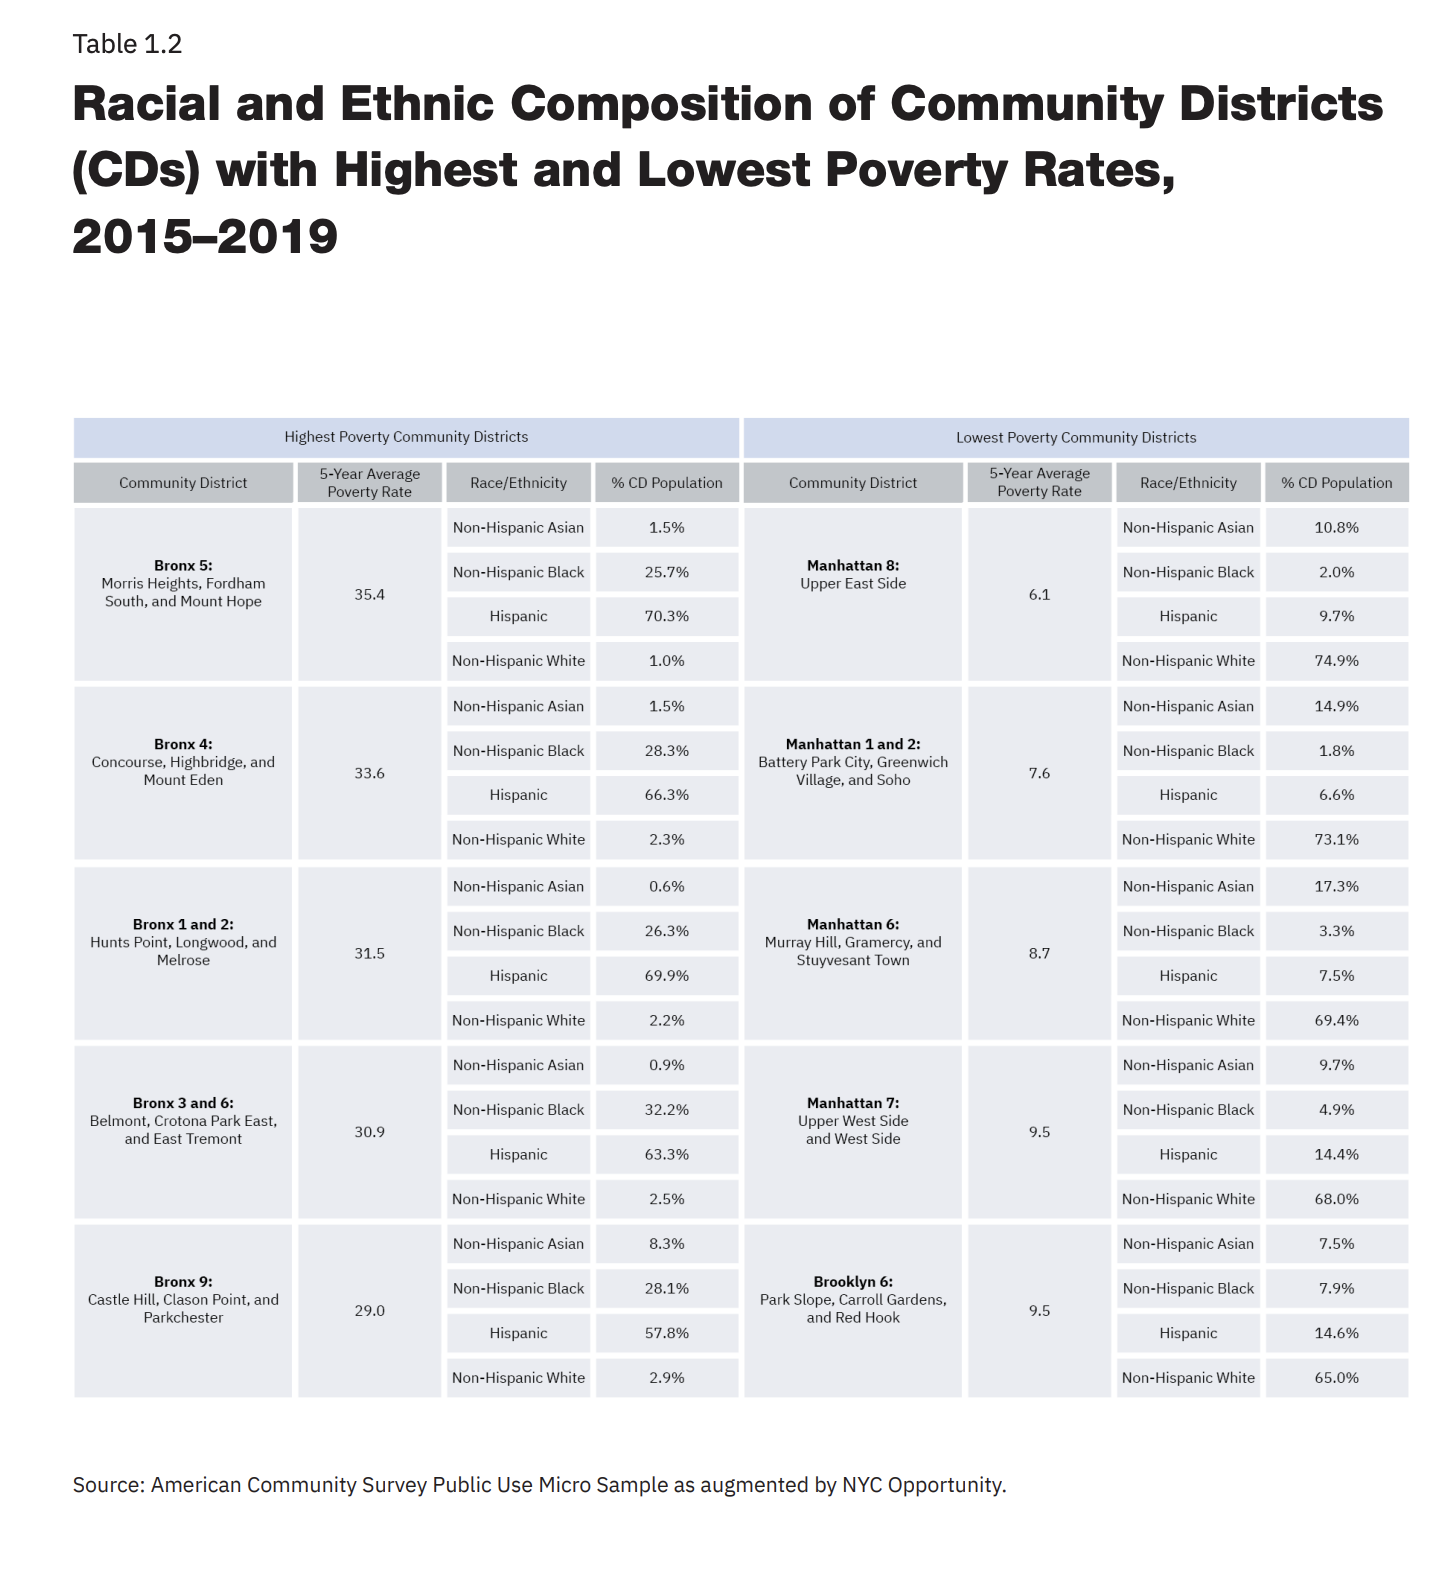

In [28]:
# read cd-data.csv

df_cd = pd.read_csv('cd-data.csv')
df_cd

,borough,cd-1,cd-2,intakes,foster,pct-foster
0,Bronx,Mott Haven,Melrose,1421,65,4.6
1,Bronx,Hunts Point,Longwood,791,41,5.2
2,Bronx,Morrisania,Crotona,1278,42,3.3
3,Bronx,Highbridge,Concourse,1548,64,4.1
4,Bronx,Fordham,University Heights,1258,42,3.3
...,...,...,...,...,...,...
65,Staten Island,South Beach,Willowbrook,539,10,1.9
66,Staten Island,Tottenville,Great Kills,456,13,2.9
67,Staten Island,Unspecified,NaN,33,0,0.0
68,Staten Island,Total,NaN,2717,86,3.2


y1 = intakes x1= poverty x2= race x3= no. of children

y2 = foster

y3 = % foster


every community district in nyc

In [ ]:
# do regression model

%%R -i df_cd

lm_model <- lm(incarceration_rate ~ poverty_rate + unemployment_rate + high_school_graduation_rate + median_income + percent_white + percent_black + percent_hispanic, data = df_cd)

summary(lm_model)

In [55]:
# demographics of community districts with highest povert and lowest poverty rates in nyc
data = {
    'borough': ['bronx-1', 'bronx-2', 'bronx-3', 'bronx-4', 'bronx-5', 'bronx-6', 'bronx-9', 'brooklyn-6', 'manhattan-2', 'manhattan-6', 'manhattan-7', 'manhattan-8'],
    'intakes': [1421, 791, 1278, 1548, 1258, 1297, 1662, 363, 34, 148, 494, 292],
    'foster': [65, 41, 42, 64, 42, 43, 50, 19, 0, 0, 17, 0],
    'pct_foster': [4.6, 5.2, 3.3, 4.1, 3.3, 3.3, 3, 5.2, 0, 0, 3.4, 0],
    'ave_poverty': [31.5, 31.5, 30.9, 33.6, 35.4, 30.9, 29, 9.5, 7.6, 8.7, 9.5, 6.1],
    'pct_asian': [0.6, 0.6, 0.9, 1.5, 1.5, 0.9, 8.3, 7.5, 14.9, 17.3, 9.7, 10.8],
    'pct_black': [26.3, 26.3, 32.2, 28.3, 25.7, 32.2, 28.1, 7.9, 1.8, 3.3, 4.9, 2],
    'pct_hispanic': [69.9, 69.9, 63.3, 66.3, 70.3, 63.3, 57.8, 14.6, 6.6, 7.5, 14.4, 9.7],
    'pct_white': [2.2, 2.2, 2.5, 2.3, 1, 2.5, 2.9, 65, 73.1, 69.4, 68, 74.9]
}

df_data = pd.DataFrame(data)
df_data


,borough,intakes,foster,pct_foster,ave_poverty,pct_asian,pct_black,pct_hispanic,pct_white
0,bronx-1,1421,65,4.6,31.5,0.6,26.3,69.9,2.2
1,bronx-2,791,41,5.2,31.5,0.6,26.3,69.9,2.2
2,bronx-3,1278,42,3.3,30.9,0.9,32.2,63.3,2.5
3,bronx-4,1548,64,4.1,33.6,1.5,28.3,66.3,2.3
4,bronx-5,1258,42,3.3,35.4,1.5,25.7,70.3,1.0
5,bronx-6,1297,43,3.3,30.9,0.9,32.2,63.3,2.5
6,bronx-9,1662,50,3.0,29.0,8.3,28.1,57.8,2.9
7,brooklyn-6,363,19,5.2,9.5,7.5,7.9,14.6,65.0
8,manhattan-2,34,0,0.0,7.6,14.9,1.8,6.6,73.1
9,manhattan-6,148,0,0.0,8.7,17.3,3.3,7.5,69.4


In [50]:
%%R -i df_data

# intakes = ave_poverty + pct_black + pct_hispanic


lm_model <- lm(intakes ~ ave_poverty + pct_black + pct_hispanic, data = df_data)
summary(lm_model)



Call:
lm(formula = intakes ~ ave_poverty + pct_black + pct_hispanic, 
    data = df_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-403.83 -149.16  -39.75  183.84  367.19 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)   -27.259    267.362  -0.102    0.921
ave_poverty    32.272     58.094   0.556    0.594
pct_black      34.038     24.883   1.368    0.209
pct_hispanic   -9.867     24.164  -0.408    0.694

Residual standard error: 260.9 on 8 degrees of freedom
Multiple R-squared:  0.8584,	Adjusted R-squared:  0.8054 


F-statistic: 16.17 on 3 and 8 DF,  p-value: 0.0009305



`geom_smooth()` using formula = 'y ~ x'


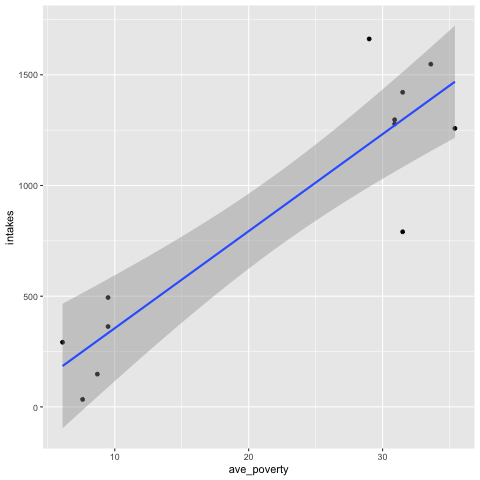

In [51]:
%%R

ggplot(df_data,aes(y=intakes,x=ave_poverty))+geom_point()+geom_smooth(method="lm")

In [52]:
%%R -i df_data

# foster = ave_poverty + pct_black + pct_hispanic

lm_model <- lm(foster ~ ave_poverty + pct_black + pct_hispanic, data = df_data)
summary(lm_model)


Call:
lm(formula = foster ~ ave_poverty + pct_black + pct_hispanic, 
    data = df_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.185  -6.734  -3.827   7.356  14.623 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)    0.4737    10.8384   0.044    0.966
ave_poverty   -0.3670     2.3550  -0.156    0.880
pct_black      0.3642     1.0087   0.361    0.727
pct_hispanic   0.7682     0.9796   0.784    0.456

Residual standard error: 10.58 on 8 degrees of freedom
Multiple R-squared:  0.8581,	Adjusted R-squared:  0.8048 
F-statistic: 16.12 on 3 and 8 DF,  p-value: 0.0009404



`geom_smooth()` using formula = 'y ~ x'


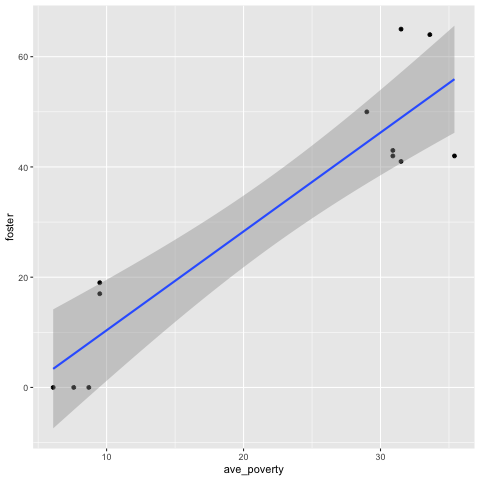

In [53]:
%%R

ggplot(df_data,aes(y=foster,x=ave_poverty))+geom_point()+geom_smooth(method="lm")

In [64]:
%%R -i df_data

# pct_foster = ave_poverty + pct_black + pct_hispanic

lm_model <- lm(pct_foster ~ ave_poverty + pct_black + pct_hispanic, data = df_data)
summary(lm_model)


Call:
lm(formula = pct_foster ~ ave_poverty + pct_black + pct_hispanic, 
    data = df_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2440 -0.6699 -0.3254  0.5101  3.1511 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)   2.73139    1.64890   1.656    0.136
ave_poverty  -0.41188    0.35828  -1.150    0.284
pct_black     0.03729    0.15346   0.243    0.814
pct_hispanic  0.20108    0.14903   1.349    0.214

Residual standard error: 1.609 on 8 degrees of freedom
Multiple R-squared:  0.4929,	Adjusted R-squared:  0.3028 
F-statistic: 2.592 on 3 and 8 DF,  p-value: 0.1251



`geom_smooth()` using formula = 'y ~ x'


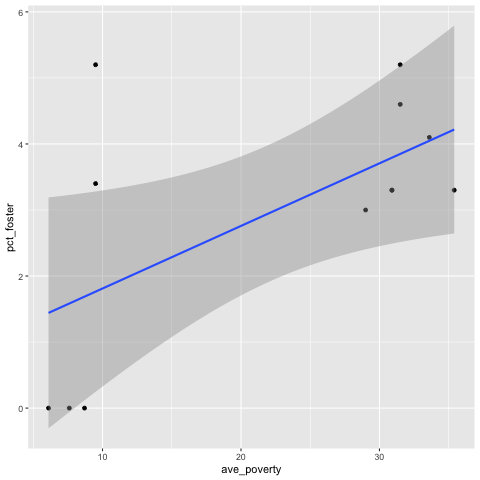

In [57]:
%%R

ggplot(df_data,aes(y=pct_foster,x=ave_poverty))+geom_point()+geom_smooth(method="lm")

### Bronx

In [32]:
# Bronx data
data_bronx = {
    'cd': ['bronx-1', 'bronx-2', 'bronx-3', 'bronx-4', 'bronx-5', 'bronx-6'],
    'intakes': [1421, 791, 1278, 1548, 1258, 1297],
    'foster': [65, 41, 42, 64, 42, 43],
    'pct_foster': [4.6, 5.2, 3.3, 4.1, 3.3, 3.3],
    'ave_poverty': [31.5, 31.5, 30.9, 33.6, 35.4, 30.9],
    'pct_asian': [0.6, 0.6, 0.9, 1.5, 1.5, 0.9],
    'pct_black': [26.3, 26.3, 32.2, 28.3, 25.7, 32.2],
    'pct_hispanic': [69.9, 69.9, 63.3, 66.3, 70.3, 63.3],
    'pct_white': [2.2, 2.2, 2.5, 2.3, 1, 2.5]
}

# put in a dataframe
df_bronx = pd.DataFrame(data_bronx)
df_bronx

,cd,intakes,foster,pct_foster,ave_poverty,pct_asian,pct_black,pct_hispanic,pct_white
0,bronx-1,1421,65,4.6,31.5,0.6,26.3,69.9,2.2
1,bronx-2,791,41,5.2,31.5,0.6,26.3,69.9,2.2
2,bronx-3,1278,42,3.3,30.9,0.9,32.2,63.3,2.5
3,bronx-4,1548,64,4.1,33.6,1.5,28.3,66.3,2.3
4,bronx-5,1258,42,3.3,35.4,1.5,25.7,70.3,1.0
5,bronx-6,1297,43,3.3,30.9,0.9,32.2,63.3,2.5


In [36]:
%%R -i df_bronx

# intakes = ave_poverty + pct_black + pct_hispanic

lm_model_bronx <- lm(intakes ~ ave_poverty + pct_black + pct_hispanic, data = df_bronx)
summary(lm_model_bronx)



Call:
lm(formula = intakes ~ ave_poverty + pct_black + pct_hispanic, 
    data = df_bronx)

Residuals:
         0          1          2          3          4          5 
 3.150e+02 -3.150e+02 -9.500e+00  1.006e-11 -8.868e-12  9.500e+00 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  22364.96   34011.43   0.658    0.578
ave_poverty     28.03     115.10   0.243    0.830
pct_black     -225.73     372.51  -0.606    0.606
pct_hispanic  -231.83     315.14  -0.736    0.539

Residual standard error: 315.1 on 2 degrees of freedom
Multiple R-squared:  0.3987,	Adjusted R-squared:  -0.5032 
F-statistic: 0.4421 on 

3 and 2 DF,  p-value: 0.7482



`geom_smooth()` using formula = 'y ~ x'


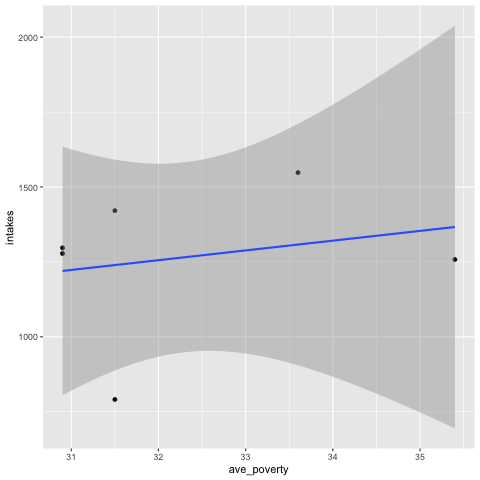

In [40]:
%%R

ggplot(df_bronx,aes(y=intakes,x=ave_poverty))+geom_point()+geom_smooth(method="lm")

In [41]:
%%R -i df_bronx

# foster = ave_poverty + pct_black + pct_hispanic

lm_model_bronx <- lm(foster ~ ave_poverty + pct_black + pct_hispanic, data = df_bronx)
summary(lm_model_bronx)


Call:
lm(formula = foster ~ ave_poverty + pct_black + pct_hispanic, 
    data = df_bronx)

Residuals:
         0          1          2          3          4          5 
 1.200e+01 -1.200e+01 -5.000e-01  3.846e-13 -3.384e-13  5.000e-01 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  2055.408   1296.209   1.586    0.254
ave_poverty    -4.427      4.387  -1.009    0.419
pct_black     -22.552     14.197  -1.589    0.253
pct_hispanic  -18.167     12.010  -1.513    0.270

Residual standard error: 12.01 on 2 degrees of freedom
Multiple R-squared:  0.5742,	Adjusted R-squared:  -0.06458 
F-statistic: 0.8989 on 3 and 2 DF,  p-value: 0.5649



`geom_smooth()` using formula = 'y ~ x'


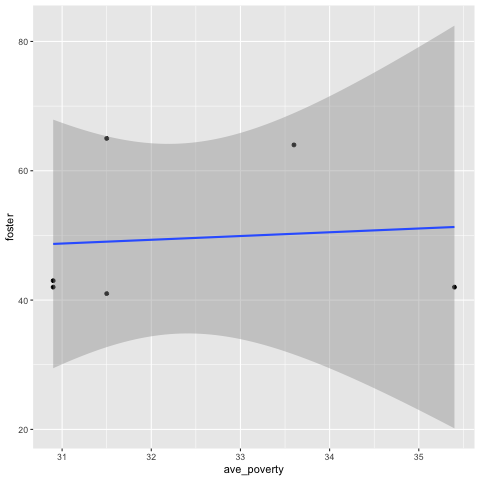

In [43]:
%%R

ggplot(df_bronx,aes(y=foster,x=ave_poverty))+geom_point()+geom_smooth(method="lm")

In [42]:
%%R -i df_bronx

# pct_foster = ave_poverty + pct_black + pct_hispanic

lm_model_bronx <- lm(pct_foster ~ ave_poverty + pct_black + pct_hispanic, data = df_bronx)
summary(lm_model_bronx)


Call:
lm(formula = pct_foster ~ ave_poverty + pct_black + pct_hispanic, 
    data = df_bronx)

Residuals:
         0          1          2          3          4          5 
-3.000e-01  3.000e-01  2.540e-15 -9.576e-15  8.493e-15  1.901e-15 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept)   95.5468    32.3771   2.951   0.0982 .
ave_poverty   -0.5063     0.1096  -4.620   0.0438 *
pct_black     -1.0684     0.3546  -3.013   0.0948 .
pct_hispanic  -0.6667     0.3000  -2.222   0.1564  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3 on 2 degrees of freedom
Multiple R-squared:  0.945,	Adjusted R-squared:  0.8625 
F-statistic: 11.46 on 3 and 2 DF,  p-value: 0.08134



`geom_smooth()` using formula = 'y ~ x'


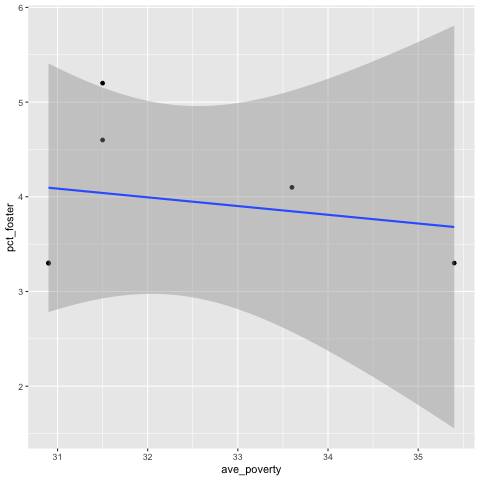

In [44]:
%%R

ggplot(df_bronx,aes(y=pct_foster,x=ave_poverty))+geom_point()+geom_smooth(method="lm")